# Model Hubbarda
## Diagonalizacja przy użyciu metody Lanczosa

In [26]:
using LinearAlgebra
using PlotlyJS
using KrylovKit

include("hubbard_core.jl")

compute_thermodynamic_quantities (generic function with 1 method)

Zależność temperaturowa:

In [3]:
dim_sizes = (2,3)
N = reduce(*, dim_sizes)
# states_1d(n) = reshape(Iterators.product([[0,1] for _ in 1:2n]...) .|> collect, (1, 4^n))
# my_states = states_1d(N)
next(n) = [collect(2:n); 1]
params = Params(dim_sizes, [next(d) for d in dim_sizes])

Params((2, 3), [[2, 1], [2, 3, 1]])

In [5]:
U = 1.0
t = 1.0
k = 1.0

# function compute_thermodynamic_quantities(params, chem_pot, temperature, U, t, avg_no_multiplier)
#     N = reduce(*, params.dim_sizes)
#     hamiltonian = sprand(4^N, 4^N, 16.0^-N) ./ 10^6
#     H_matrix = get_hamiltonian(hamiltonian, params, U, t, chem_pot)
#     out = Array{Float64}(undef, 4N^2)
#     fill!(out, NaN)
#     energies, H_states, conv_info = out, out, out
#     try
#         energies, H_states, conv_info = eigsolve(H_matrix, 4, :SR, tol=1e-27)
#     catch e
#         print("Error $e at μ=$chem_pot, T=$temperature, U=$U, t=$t")
#         return out, out, out, out
#     end
#     exp_vec = exp.(-real(energies) / (k*temperature))
#     stat_sum = reduce(+, exp_vec)
#     avg_particles = [no_particles_from_state(H_state, avg_no_multiplier) for H_state in H_states]
    
#     densities = exp_vec ./ stat_sum
#     avg_particles_temp = reduce(+, densities .* avg_particles)
#     entropy = -k * reduce(+, [abs(p)*log(abs(p)) for p in densities])
#     grand_potential = -k*temperature*log(stat_sum)
#     return densities, avg_particles_temp, entropy, grand_potential
# end

N = reduce(*, params.dim_sizes)
multiplier = [reduce(+, digits(n, base=2)) for n in 0:(4^N -1)]
chem_potentials = -7.5:0.1:7.5
temp_range = round.(10.0.^(range(-0.1,stop=1.0,length=3)), digits=3)
# compute_thermodynamic_quantities(params, 1, 1, U, t)
thermodynamics = [[compute_thermodynamic_quantities(params, chem_pot, temperature, U, t, multiplier)
        for chem_pot in chem_potentials] for temperature in temp_range]

avg_n = [[thermodynamics[j][i][2] for i in eachindex(chem_potentials)] for j in eachindex(temp_range)]
entropy_vals = [[thermodynamics[j][i][3] for i in eachindex(chem_potentials)] for j in eachindex(temp_range)]
grand_pots = [[thermodynamics[j][i][4] for i in eachindex(chem_potentials)] for j in eachindex(temp_range)]

helmholtz_vals = [[grand_pot + chem_pot*avg_no for (grand_pot, chem_pot, avg_no) in zip(grand_pot_rows, chem_potentials, avg_no_rows)] 
    for (grand_pot_rows, temp, avg_no_rows) in zip(grand_pots, temp_range, avg_n)]

U_vals = [[helm + entr*temp for (pot, helm, entr) in zip(chem_potentials, helmholtz_vals_rows, entr_rows)]
     for (temp, helmholtz_vals_rows, entr_rows) in zip(temp_range, helmholtz_vals, entropy_vals)]

3-element Vector{Vector{Number}}:
 [-0.007817215471169859, -0.008861787773703104, -0.010045236823127236, -0.011384520940737303 - 0.0im, -0.01290416374998845, -0.014558727568811568 - 0.0im, -0.01656998098901443 - 0.0im, -0.018773116641714736, -0.021266039284498002, -0.024085978006941913 - 0.0im  …  5.9063775679329575 + 0.0im, 5.885734309056199 + 0.0im, 5.901902539629786 + 0.0im, 5.935200078146414 + 0.0im, 5.942721854489686 + 0.0im, 5.931632528238864 + 0.0im, 5.939927274290173 + 0.0im, 5.960507485772245 + 0.0im, 5.95368155306747, 5.9692109985361705 + 0.0im]
 [-0.6936797018645122 - 0.0im, -0.7410532277365105, -0.7576812262064023 - 0.0im, -0.7392585026429113 - 0.0im, -0.7913591564138818, -0.676656124456251 - 0.0im, -0.8255392875893026 - 0.0im, -0.8427939304046115, -0.8601450897445688 - 0.0im, -0.8775825665272818 - 0.0im  …  4.4852155207748545 + 0.0im, 4.660168798495486 + 0.0im, 4.686427459341601 + 0.0im, 4.576450556985075 + 0.0im, 4.597804359874455 + 0.0im, 4.5514584603565424, 4.7901524674

Testy:

In [93]:
function timetest(dim_sizes)
    next(n) = [collect(2:n); 1]
    params = Params(dim_sizes, [next(d) for d in dim_sizes])
    hamiltonian = sprand(4^N, 4^N, 16.0^-N) ./ 10^6

    H_matrix = get_hamiltonian(hamiltonian, params, 1, 1, 1)
    # energies, H_states, conv_info = eigsolve(H_matrix, 4, :SR, tol=1e-22)
    # length(H_states[1])
end

timetest (generic function with 1 method)

In [113]:
dim_sizes = (2,2,2)
hmat = timetest(dim_sizes)
@time energies, H_states, conv_info = eigsolve(hmat, 4, :SR, tol=1e-22)
# next(n) = [collect(2:n); 1]
    # params = Params(dim_sizes, [next(d) for d in dim_sizes])
# @benchmark hamiltonian_on_state(params, 1, 1, 1, idx_to_fullstate(20, dim_sizes))

# 2x2 : 0.002144 seconds (31.91 k allocations: 1.827 MiB)
# diag: 
# 2x3 : 0.133248 seconds (858.22 k allocations: 56.054 MiB, 7.95% gc time)
# diag: 
# 2x2x2: 21.935337 seconds (23.73 M allocations: 1.520 GiB, 0.95% gc time)
# diag: 1.656569 seconds (63.04 k allocations: 269.177 MiB, 1.57% gc time, 4.89% compilation time)
# 3x3 : 1208.816598 seconds (78.18 M allocations: 5.128 GiB, 0.07% gc time)

# ram rośnie jak 3^delta N
# czas rośnie eksponencjalnie? jak exp(wym * 3.27)

  1.656569 seconds (63.04 k allocations: 269.177 MiB, 1.57% gc time, 4.89% compilation time)


(ComplexF64[-20.606344508756614 + 0.0im, -20.571496932428477 + 0.0im, -20.571496932428403 + 0.0im, -20.412377664670046 + 0.0im], Vector{ComplexF64}[[-4.783273535897512e-19 + 0.0im, -1.455927473115025e-18 + 0.0im, -6.901341253284204e-18 + 0.0im, 1.678587883480175e-18 + 0.0im, -6.324344017431719e-18 + 0.0im, -5.009665038143056e-18 + 0.0im, -1.3976175537845705e-18 + 0.0im, -1.538193622804107e-18 + 0.0im, -2.6141682764576835e-19 + 0.0im, -3.2234741826857614e-18 + 0.0im  …  -6.421176460613145e-18 + 0.0im, 9.91817968926923e-19 + 0.0im, -1.023651335920566e-17 + 0.0im, -9.616536954933415e-18 + 0.0im, -1.02241876689269e-17 + 0.0im, -7.427873388317674e-20 + 0.0im, -1.8946209526644327e-19 + 0.0im, 5.4838532478170546e-18 + 0.0im, 3.063886257378168e-18 + 0.0im, 4.482551570180156e-18 + 0.0im], [2.644475381300458e-18 + 0.0im, 3.797401064903624e-18 + 0.0im, 1.6767107749653326e-18 + 0.0im, -1.0689293569065184e-18 + 0.0im, 2.4484559021171655e-18 + 0.0im, -8.291762324725314e-19 + 0.0im, -1.85007724779703

In [88]:
idxs, vals = ([1, 3, 5], Any[2, 4.1, -2.8])
for (idx, val) in zip(idxs, vals)
    println(string(idx) * " " * string(val))
end

1 2
3 4.1
5 -2.8


## Wykresy

Średnia ilość cząstek:

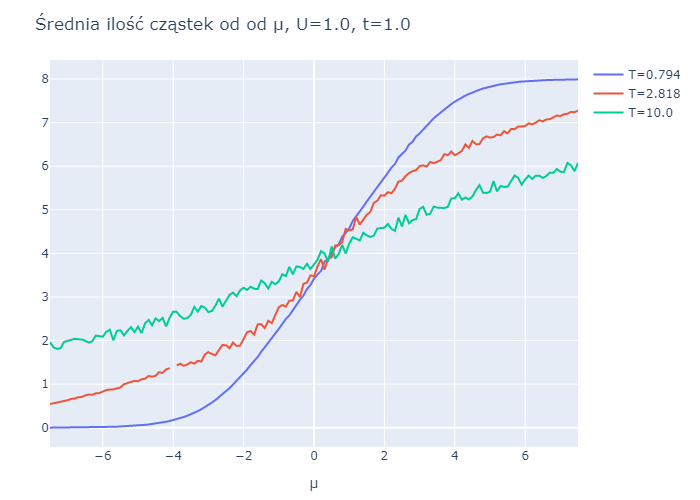

In [11]:
y_vals = avg_n

layout = Layout(
    title="Średnia ilość cząstek od od μ, U=$U, t=$t",
    xaxis_title="μ",
    yaxis_title="",
)
p = plot([scatter(x=chem_potentials, y=yval, name="T=$t") for (yval, t) in zip(y_vals, temp_range)], layout)

Entropia:

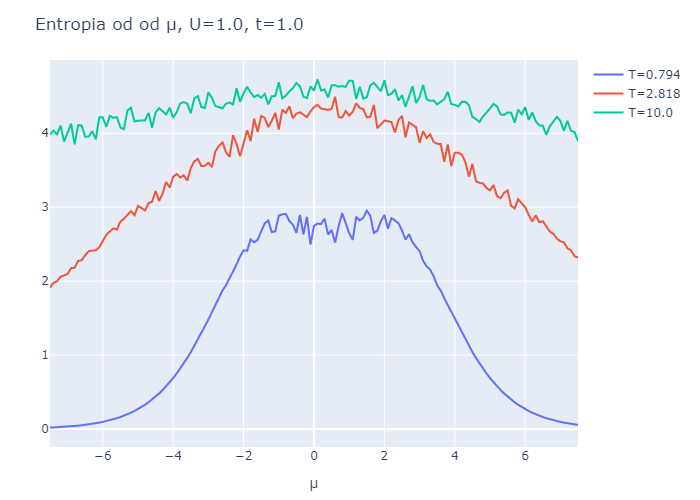

In [15]:
y_vals = entropy_vals

layout = Layout(
    title="Entropia od od μ, U=$U, t=$t",
    xaxis_title="μ",
    yaxis_title="",
)
plot([scatter(x=chem_potentials, y=yval, name="T=$t") for (yval, t) in zip(y_vals, temp_range)], layout)

Wielki potencjał termodynamiczny:

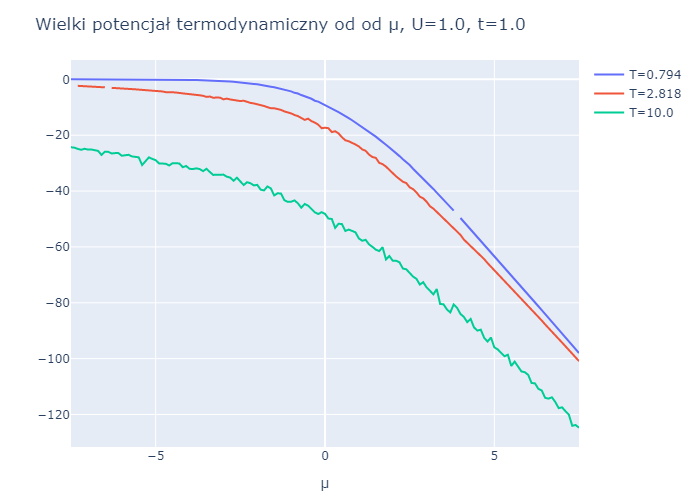

In [17]:
y_vals = grand_pots

layout = Layout(
    title="Wielki potencjał termodynamiczny od od μ, U=$U, t=$t",
    xaxis_title="μ",
    yaxis_title="",
)
plot([scatter(x=chem_potentials, y=yval, name="T=$t") for (yval, t) in zip(y_vals, temp_range)], layout)

Energia swobodna Helmholtza:

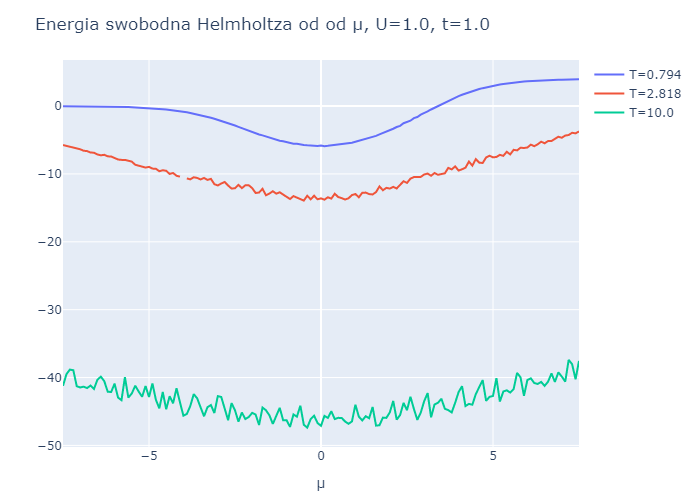

In [12]:
y_vals = real.(helmholtz_vals)

layout = Layout(
    title="Energia swobodna Helmholtza od od μ, U=$U, t=$t",
    xaxis_title="μ",
    yaxis_title="",
)
plot([scatter(x=chem_potentials, y=yval, name="T=$t") for (yval, t) in zip(y_vals, temp_range)], layout)

Energia wewnętrzna:

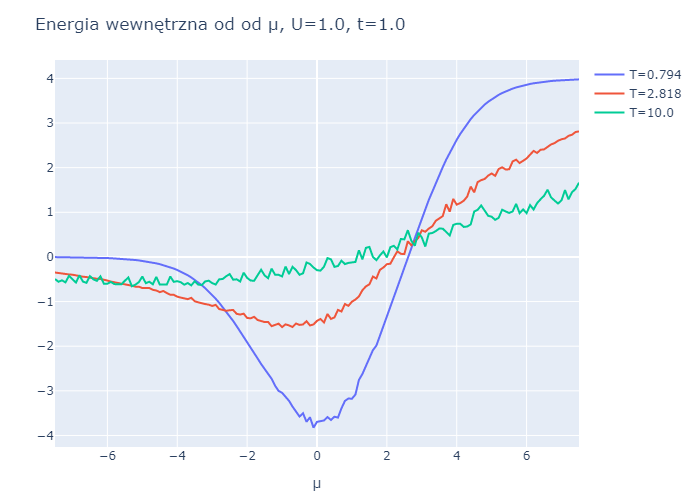

In [14]:
y_vals = U_vals

layout = Layout(
    title="Energia wewnętrzna od od μ, U=$U, t=$t",
    xaxis_title="μ",
    yaxis_title="",
)
plot([scatter(x=chem_potentials, y=yval, name="T=$t") for (yval, t) in zip(y_vals, temp_range)], layout)

## Uwzględniamy symetrię liczby cząstek

In [1]:
using LinearAlgebra
using PlotlyJS
using KrylovKit

include("hubbard_core.jl")

compute_thermodynamic_quantities (generic function with 1 method)

In [9]:
dim_sizes = (2,2)
N = reduce(*, dim_sizes)
# states_1d(n) = reshape(Iterators.product([[0,1] for _ in 1:2n]...) .|> collect, (1, 4^n))
# my_states = states_1d(N)
next(n) = [collect(2:n); 1]
params = Params(dim_sizes, [next(d) for d in dim_sizes])

Params((2, 2), [[2, 1], [2, 1]])

In [17]:
U = 1.0
t = 1.0
k = 1.0

N = reduce(*, params.dim_sizes)
multiplier = [reduce(+, digits(n, base=2)) for n in 0:(4^N -1)]
chem_potentials = -7.5:0.1:7.5
temp_range = round.(10.0.^(range(-0.1,stop=1.0,length=3)), digits=3)
# compute_thermodynamic_quantities(params, 1, 1, U, t)

avg_n = Array{Array{Float64}}(undef, length(temp_range))
entropy_vals = Array{Array{Float64}}(undef, length(temp_range))
grand_pots = Array{Array{Float64}}(undef, length(temp_range))

for temp_idx in eachindex(temp_range)
    temp_avg_n = Array{Float64}(undef, length(chem_potentials))
    temp_entropy_vals = Array{Float64}(undef, length(chem_potentials))
    temp_grand_pots = Array{Float64}(undef, length(chem_potentials))
    Threads.@threads for chem_idx in eachindex(chem_potentials)
        density, avg_particles, entropy, grand_pot = compute_thermodynamic_quantities(params, 
            chem_potentials[chem_idx], temp_range[temp_idx], U, t, multiplier)
        
        # @show avg_particles
        temp_avg_n[chem_idx] = avg_particles
        temp_entropy_vals[chem_idx] = entropy
        temp_grand_pots[chem_idx] = grand_pot
    end
    avg_n[temp_idx] = temp_avg_n
    entropy_vals[temp_idx] = temp_entropy_vals
    grand_pots[temp_idx] = temp_grand_pots
end

helmholtz_vals = [[grand_pot + chem_pot*avg_no for (grand_pot, chem_pot, avg_no) in zip(grand_pot_rows, chem_potentials, avg_no_rows)] 
    for (grand_pot_rows, temp, avg_no_rows) in zip(grand_pots, temp_range, avg_n)]

U_vals = [[helm + entr*temp for (pot, helm, entr) in zip(chem_potentials, helmholtz_vals_rows, entr_rows)]
    for (temp, helmholtz_vals_rows, entr_rows) in zip(temp_range, helmholtz_vals, entropy_vals)]

avg_n 

(1, Array{Float64}[[0.0022885271887257267, 0.0025953508420781548, 0.00294325832512927, 0.003337736105244975, 0.003784999683914037, 0.0042920870356792425, 0.004866966971340964, 0.0055186656140999634, 0.006257395002519059, 0.007094712070864433  …  7.975191639014543, 7.978099893247096, 7.980670157289556, 7.982940970225438, 7.984946656250768, 7.9867179296627455, 7.988281785348559, 7.989662351089449, 7.990880901522737, 7.991956320409086], [0.5515942956237195, 0.5560326356874378, 0.5723331940235574, 0.5990509635170882, 0.615144845582059, 0.6380124129490812, 0.6491846552778181, 0.6678971268530842, 0.6779536644074942, 0.7066274322281642  …  7.066381712563189, 7.1164750839663, 7.101536613396452, 7.147273776101746, 7.180239563546278, 7.171785176271904, 7.1941601347017015, 7.216334919221602, 7.238307743371506, 7.2696822051306995], [1.8371140216848891, 1.8891162542106004, 1.824389040836763, 1.9529159201161916, 1.9918600174277825, 1.892968278392212, 1.9882513712520387, 1.9679655948930113, 2.0074913